In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Choose the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahanthirahul","key":"a3259d193eb2feb51291b2097357f9f9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d <dataset-owner>/<dataset-name>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `kaggle datasets download -d <dataset-owner>/<dataset-name>'


In [ ]:
!kaggle datasets download -d moazeldsokyx/plantvillage


Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/plantvillage
License(s): CC0-1.0
 98% 321M/329M [00:07<00:00, 27.5MB/s]
100% 329M/329M [00:07<00:00, 45.0MB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile('plantvillage.zip', 'r') as zip_ref:
    zip_ref.extractall('datasett')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
import os  # Operating system-specific functionality.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import numpy as np  # Numerical computing library for handling arrays and mathematical operations.
import matplotlib.image as mpimg  # Library for reading and displaying images.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Part of TensorFlow for real-time data augmentation during model training.
import tensorflow as tf  # Deep learning framework.
from tensorflow.keras.models import Sequential  # Keras sequential model for building neural networks.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Keras layers for building neural networks.
from tensorflow.keras.callbacks import ModelCheckpoint  # Callback in Keras for saving the model during training.
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# Setting the path to the dataset directory
dataset_path = r"/content/datasett/dataset"

# Listing the contents (files and directories) of the  dataset
os.listdir(dataset_path)


['validation', 'test', 'train']

In [ ]:
# Creating path for the training subset of the dataset
train_path = os.path.join(dataset_path, 'train')

# Creating path for the validation subset of the dataset
validation_path = os.path.join(dataset_path, 'validation')

# Creating path for the test subset of the dataset
test_path = os.path.join(dataset_path, 'test')

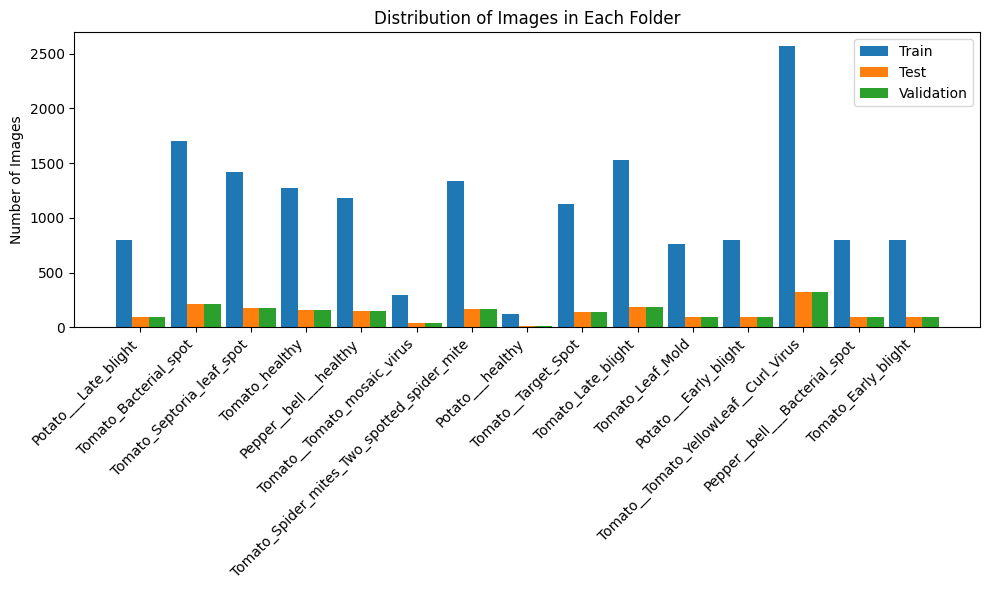

In [ ]:
# Defining the folders representing different subsets of the dataset
folders = ['train', 'test', 'validation']

# Dictionary to store the lengths of subfolders in each dataset subset
subfolder_lengths = {folder: {} for folder in folders}

# Iterating through each folder (train, test, validation)
for folder in folders:
    # Getting the list of subfolders within the current dataset subset
    subfolders = os.listdir(os.path.join(dataset_path, folder))

    # Iterating through each subfolder
    for subfolder in subfolders:
        # Calculating the number of files (images) in the current subfolder
        subfolder_length = len(os.listdir(os.path.join(dataset_path, folder, subfolder)))

        # Storing the subfolder length in the dictionary
        subfolder_lengths[folder][subfolder] = subfolder_length

# Extracting subfolder names and their respective lengths for plotting
subfolder_names = list(subfolder_lengths['train'].keys())
train_lengths = list(subfolder_lengths['train'].values())
test_lengths = list(subfolder_lengths['test'].values())
val_lengths = list(subfolder_lengths['validation'].values())

# Setting up parameters for the bar plot
x = np.arange(len(subfolder_names))
width = 0.3

# Creating a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, train_lengths, width, label='Train')
rects2 = ax.bar(x, test_lengths, width, label='Test')
rects3 = ax.bar(x + width, val_lengths, width, label='Validation')

# Adding labels and legend to the plot
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images in Each Folder')
ax.set_xticks(x)
ax.set_xticklabels(subfolder_names, rotation=45, ha='right')
ax.legend()
# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


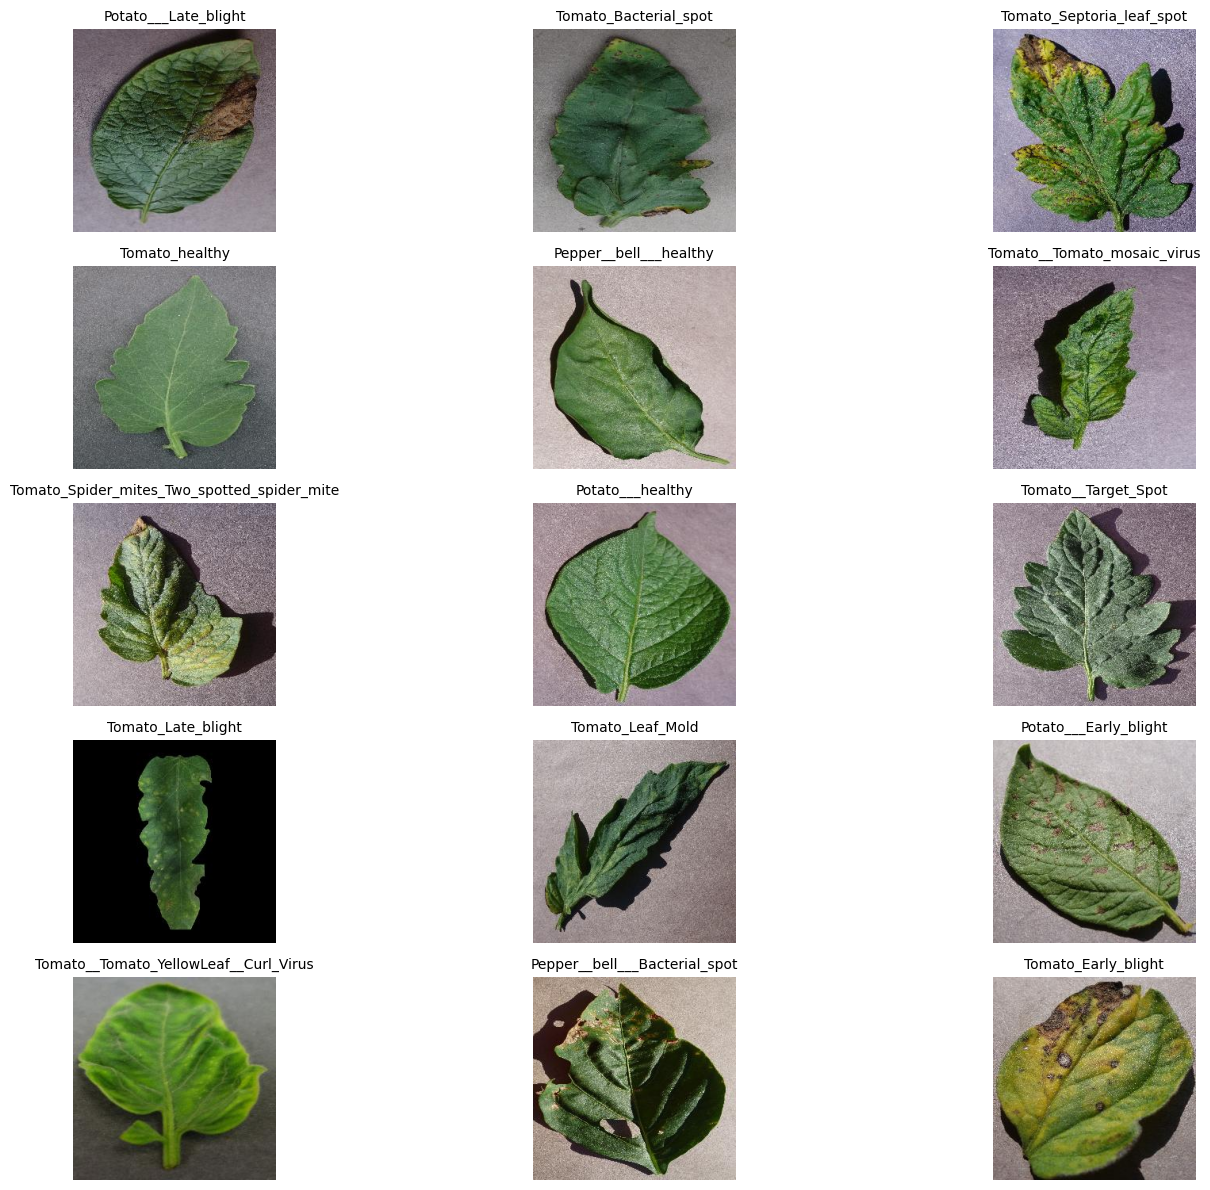

In [ ]:
# Create a grid to display the images
num_cols = 3  # Number of columns in the grid
num_rows = 5  # Number of rows in the grid

# Create a matplotlib figure and axis
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing

# Loop through subfolders and display an image from each
for i, subfolder in enumerate(subfolders):
    img = [image for image in os.listdir(os.path.join(train_path,subfolder))][0]

    img_path = os.path.join(train_path, subfolder, img)  # Get the first image in the subfolder
    img = mpimg.imread(img_path)  # Load the image
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(subfolder, color='black', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Define batch size and image shape for data augmentation
batch_size = 32
image_shape = (256, 256)

# Create an ImageDataGenerator for training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,  # Rescale pixel values to the range [0, 1]
    shear_range=0.2,  # Apply shear transformation with a shear intensity of 0.2
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True,  # Randomly flip images vertically
    brightness_range=[0.5, 1.5],  # Adjust brightness between 50% and 150%
    rotation_range=40,  # Rotate images by up to 40 degrees
    zoom_range=0.2  # Randomly zoom into images by 20%
)

# Create a flow generator from the training directory using the defined data augmentation settings
train_generator = train_datagen.flow_from_directory(
    train_path,  # Path to the training dataset
    target_size=image_shape,  # Resize images to the specified shape
    batch_size=batch_size,  # Set the batch size
    class_mode="categorical"  # Use categorical mode for multi-class classification
)

Found 16504 images belonging to 15 classes.


In [ ]:
# Create an ImageDataGenerator for validation data without augmentation
validation_datagen = ImageDataGenerator(
    rescale=1/255  # Rescale pixel values to the range [0, 1]
)

# Create a flow generator from the validation directory
validation_generator = validation_datagen.flow_from_directory(
    validation_path,  # Path to the validation dataset
    target_size=image_shape,  # Resize images to the specified shape
    batch_size=batch_size,  # Set the batch size
    class_mode="categorical"  # Use categorical mode for multi-class classification
)

Found 2070 images belonging to 15 classes.


In [ ]:
# Create an ImageDataGenerator for test data without augmentation
test_datagen = ImageDataGenerator(
    rescale=1/255  # Rescale pixel values to the range [0, 1]
)

# Create a flow generator from the test directory
test_generator = test_datagen.flow_from_directory(
    test_path,  # Path to the test dataset
    target_size=image_shape,  # Resize images to the specified shape
    batch_size=batch_size,  # Set the batch size
    class_mode="categorical",  # Use categorical mode for multi-class classification
    shuffle=False  # Do not shuffle the data to preserve order for evaluation
)

Found 2064 images belonging to 15 classes.


In [ ]:
# Create a Sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape of (256, 256, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters and a 3x3 kernel, followed by a ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Repeat the pattern with two more convolutional layers and max pooling layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a one-dimensional array
model.add(Flatten())

# Add a dense layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a dropout layer with a dropout rate of 0.2 to prevent overfitting
model.add(Dropout(0.2))

# Add another dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 15 units (for 15 classes) and softmax activation for multiclass classification
model.add(Dense(15, activation='softmax'))

# Compile the model using the Adam optimizer, categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best weights during training
checkpoint_callback = ModelCheckpoint("/content/drive/MyDrive/best_epoch_weights.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Display a summary of the model architecture
model.summary()


In [ ]:
# Calculate the number of steps per epoch for training and validation
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

# Set the number of training epochs
epochs = 30

# Train the model using the fit method with training and validation generators
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint_callback]  # Include the ModelCheckpoint callback for saving the best weights
)

# Find the epoch with the best accuracy on the validation set
best_epoch = np.argmax(history.history['val_accuracy']) + 1

# Print the best epoch information
print(f"Best epoch is ==> epoch {best_epoch}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/best_epoch_weights.h5')  # or .h5


In [ ]:
# Set the best_model variable to the original model
best_model = model

# Compile the best_model using the Adam optimizer, categorical crossentropy loss, and accuracy as the metric
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the best weights saved during training
best_model.load_weights(r'/content/drive/MyDrive/best_epoch_weights.h5')

# Save the entire best_model (architecture and weights) to a file named "plant_leaf_diseases_model.h5"
best_model.save("plant_leaf_diseases_model.h5")

# Indicate that training is complete, and the best model has been saved
print("Training done, and the best model is saved.")

Training done, and the best model is saved.


In [ ]:
# Evaluate the best_model on the test data using the evaluate method
evaluation = best_model.evaluate(test_generator, verbose=0)

# Print the test accuracy and test loss rounded to 2 and 3 decimal places, respectively
print(f"Test Accuracy = {round(evaluation[1], 2)}")
print(f"Test Loss = {round(evaluation[0], 3)}")

Test Accuracy = 0.96
Test Loss = 0.112


https://www.kaggle.com/code/moazeldsokyx/plant-leaf-diseases-detection-using-cnn/notebook

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


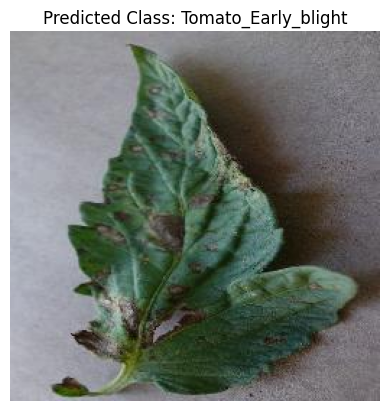

Predicted Class: Tomato_Early_blight
Prediction Probability: 0.9999


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to predict the class of a new image
def predict_plant_leaf_disease(img_path, model, target_size=(256, 256)):
    # Load the image using Keras' image module
    img = image.load_img(img_path, target_size=target_size)

    # Convert the image to a numpy array and rescale the pixel values
    img_array = image.img_to_array(img) / 255.0  # Rescale to [0, 1]

    # Add a batch dimension (since the model expects 4D input: batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction using the model
    prediction = model.predict(img_array)

    # Get the index of the class with the highest predicted probability
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    # Get the class label based on the index
    class_labels = list(train_generator.class_indices.keys())  # Get the class labels from the generator
    predicted_class_label = class_labels[predicted_class_index]

    # Plot the image with the predicted class label
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class_label}")
    plt.axis('off')
    plt.show()

    # Return the predicted class label and probability
    return predicted_class_label, prediction[0][predicted_class_index]

# Example usage
img_path = '/content/datasett/dataset/test/Tomato_Early_blight/079e0d43-e9d2-4217-b8e8-2f3b989cdab2___RS_Erly.B 7588.JPG'  # Provide the path to the image you want to predict
predicted_class, predicted_prob = predict_plant_leaf_disease(img_path, best_model)

print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probability: {predicted_prob:.4f}")
